# Задача 7.1

In [2]:
import numpy as np
import math as mth
import scipy.optimize as opt
import scipy.stats as sps
import matplotlib.pyplot as plt
from __future__ import division
%matplotlib inline

In [30]:
N = 100
sample = sps.norm.rvs(size=N)
par = [[0,1],[0,100],[10,1],[10,100]]

### Оценивание $(\theta, 1)$
Известно, что оценка максимального правдоподобия для $\theta - \bar{X}$.

Сопряженным распределением является $Norm(a, \sigma^2)$.

А байесовская оценка - $\frac{a + \sigma^2\sum X_i}{1 + n\sigma^2}$.

In [20]:
def bayes(parametres, n):
    return (parametres[0] + parametres[1]*sum(sample[:n]))/(1 + len(sample[:n])*parametres[1])

###### Построение графиков абсолютного отклонения байесовских оценок c различными параметрами априорного распределения от истинного значения параметра

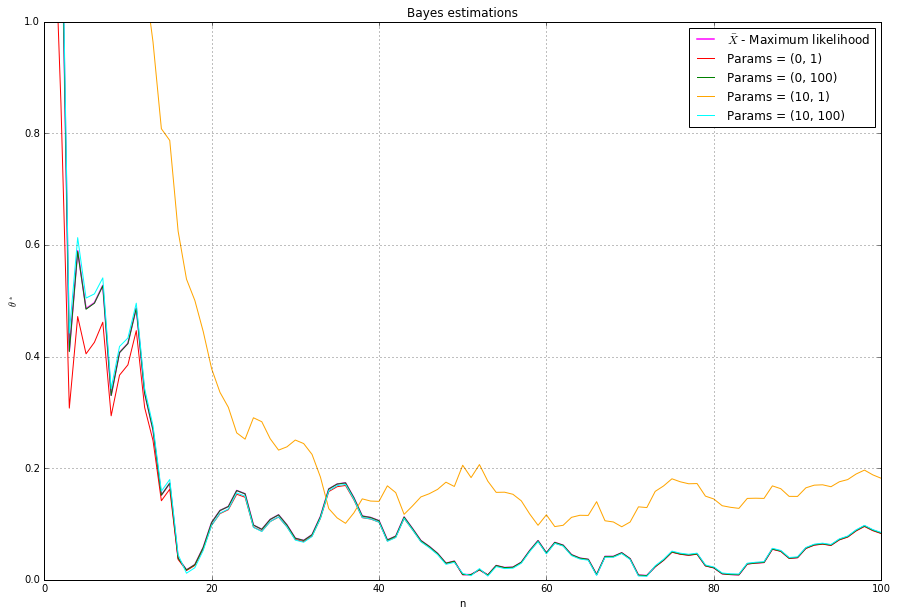

In [22]:
grid = np.arange(1, N+1)
plt.figure(figsize = (15,10))
colors = ['red', 'green', 'orange', 'cyan']
plt.plot(grid, [np.abs(sample[:n].mean()) for n in grid] ,color='magenta', linewidth=1.5,\
         label = r'$\bar{X}$ - Maximum likelihood' )
for i in np.arange(4):
    plt.plot(grid, [np.abs(bayes(par[i], n)) for n in grid],color=colors[i], linewidth=1,\
             label = 'Params = ('+str(par[i][0])+', '+str(par[i][1])+')')
plt.ylim(0, 1)
plt.title('Bayes estimations')
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel(r"$\theta^*$")
plt.show()

На графике видно, что c ростом n качество оценки улучшается, большинство оценок ведут себя одинаково, причем также, как и оценка полученная по методу максимального правдоподобия (оценка (0, 100) вообще в точности ее повторяет), хуже всего оказалась оценка с параметрами (10, 1). При маленьких n байесовская оценка с параметрами (0, 1) работает лучше, чем метод максимального правдоподобия.

### Оценивание $(0, \theta)$
Оценка максимального правдоподобия для $\theta - (\bar{X^2}-(\bar{X})^2)$.

Байесовская оценка - $\frac{\sigma^2 + \frac{\sum X_i^2}{2}}{a + \frac{n}{2} - 1}$.

In [31]:
par = [[1,1],[1,100],[10,1],[10,100]]

def var(n):
    return np.average(sample[:n]**2) - np.average(sample[:n])**2

def bayes(param, n):
    return (param[1] + np.sum(sample[:n]**2)/2.)/(param[0] + n/2. - 1)

###### Построение графиков абсолютного отклонения байесовских оценок c различными параметрами априорного распределения от истинного значения параметра

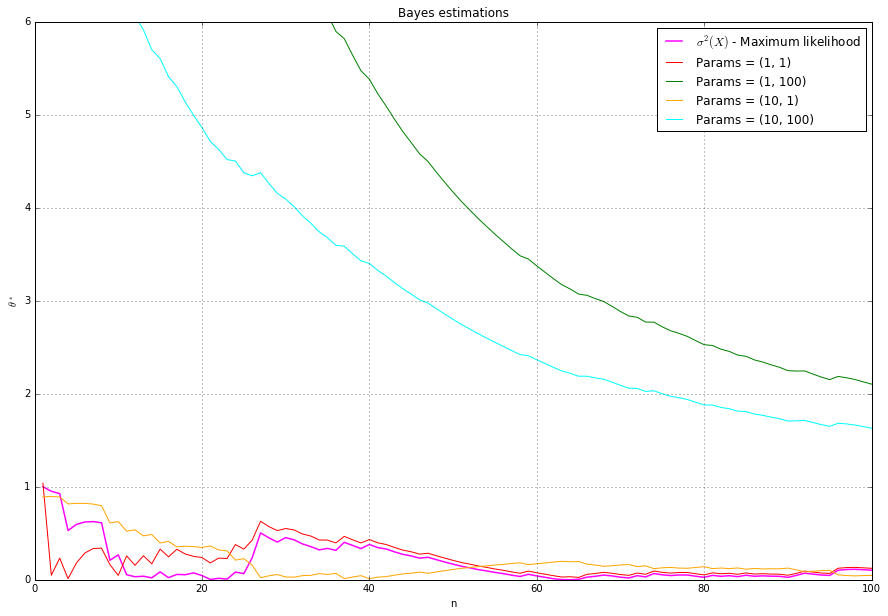

In [32]:
plt.figure(figsize = (15,10))
plt.plot(grid, [np.abs(var(n) - 1) for n in grid] ,color='magenta', linewidth=1.5,\
         label = r'$\sigma^2(X)$ - Maximum likelihood' )
for i in np.arange(4):
    plt.plot(grid, [np.abs(bayes(par[i], n) - 1) for n in grid],color=colors[i], linewidth=1,\
             label = 'Params = ('+str(par[i][0])+', '+str(par[i][1])+')')
plt.ylim(0, 6)
plt.title('Bayes estimations')
plt.legend()
plt.grid()
plt.xlabel("n")
plt.ylabel(r"$\theta^*$")
plt.show()

На графике видно, что лучшими оказались оценки с меньшим значением априорной дисперсии, оспальные оценки при больших n очень близки к оценке максимального правдоподобия